# **Airbnb Hotel Booking Analysis**
---






### Load the Excel file and inspect unique values of property types Assumption: "room type" denotes the property type in this  dataset common in Airbnb-style data. We'll extract unique values from that column


---











In [ ]:
import pandas as pd

FILEPATH = r"/content/1730285881-Airbnb_Open_Data.xlsx"

try:
    df = pd.read_excel(FILEPATH)
    # Since it's a single dataframe now, let's inspect the columns and head
    print("DataFrame loaded successfully. First 15 rows:")
    print(df.head(15))
    print("\nColumns in the DataFrame:")
    print(df.columns)
except Exception as e:
    print(f"Error reading file: {e}")
    print("Please ensure the file exists and is a valid Excel file.")

DataFrame loaded successfully. First 15 rows:
         id                                              NAME      host id  \
0   1001254                Clean & quiet apt home by the park  80014485718   
1   1002102                             Skylit Midtown Castle  52335172823   
2   1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3   1002755                                               NaN  85098326012   
4   1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5   1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   
6   1004650                                   BlissArtsSpace!  61300605564   
7   1005202                                   BlissArtsSpace!  90821839709   
8   1005754                   Large Furnished Room Near B'way  79384379533   
9   1006307                Cozy Clean Guest Room - Family Apt  75527839483   
10  1006859                Cute & Cozy Lower East Side 1 bdrm   1280143094   
11  1007411       

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Clean column names to consistent lowercase for ease
df.columns = [c.strip().lower() for c in df.columns]

# Ensure price numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group by neighbourhood group
counts = df.groupby('neighbourhood group').size().sort_values(ascending=False)
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

print(counts.head())
print(avg_price.head())



neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
dtype: int64
neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
Name: price, dtype: float64


## which neighbourhood group has the highets number of listings?


---



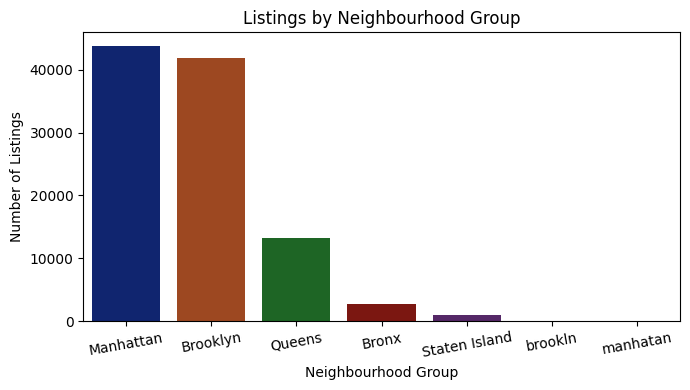

Computed listing counts and average prices, and displayed two plots


In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=counts.index, y=counts.values, palette='dark')
plt.title('Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

print('Computed listing counts and average prices, and displayed two plots')

## which neighbouhood groups has the highest average prices for airnb listings?


---



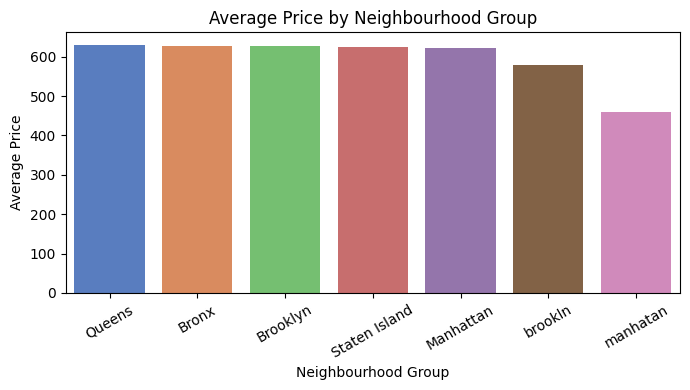

In [ ]:

plt.figure(figsize=(7,4))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='muted')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## is there a relationship between the construction year of property and price?

---



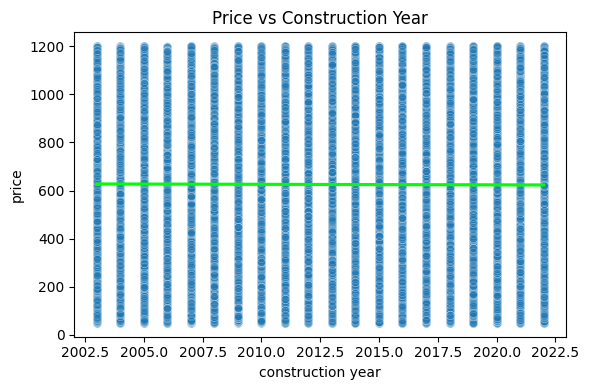

In [ ]:

try:
    # 1) Construction year vs price
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x='construction year', y='price', alpha=0.3)
    sns.regplot(data=df, x='construction year', y='price', scatter=False, color='lime')
    plt.title('Price vs Construction Year')
    plt.tight_layout()
    plt.show()
except NameError:
    print("DataFrame 'df' not found. Please ensure the data is loaded.")
except Exception as e:
    print(f"An error occurred: {e}")

## Top 10 hosts by calculated host listings count

---



host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


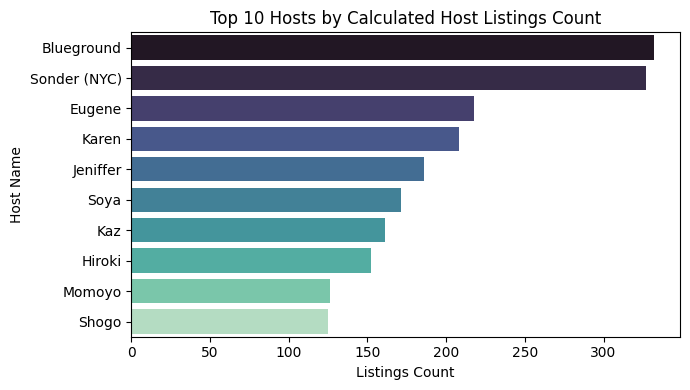

In [ ]:

host_counts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
print(host_counts)
plt.figure(figsize=(7,4))
sns.barplot(x=host_counts.values, y=host_counts.index, palette='mako')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.xlabel('Listings Count')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()

## Verified identity vs positive reviews (>=4)

---



host_identity_verified
verified       0.457640
unconfirmed    0.452754
Name: positive_review, dtype: float64


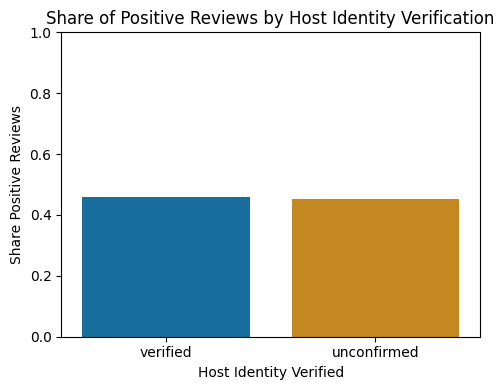

In [ ]:

import numpy as np
if 'host_identity_verified' in df.columns:
    df['positive_review'] = np.where(df['review rate number'] >= 4, 1, 0)
    id_rate = df.groupby('host_identity_verified')['positive_review'].mean().sort_values(ascending=False)
    print(id_rate)
    plt.figure(figsize=(5,4))
    sns.barplot(x=id_rate.index.astype(str), y=id_rate.values, palette='colorblind')
    plt.title('Share of Positive Reviews by Host Identity Verification')
    plt.xlabel('Host Identity Verified')
    plt.ylabel('Share Positive Reviews')
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

# #Price vs service fee correlation

---



0.9999908755543448


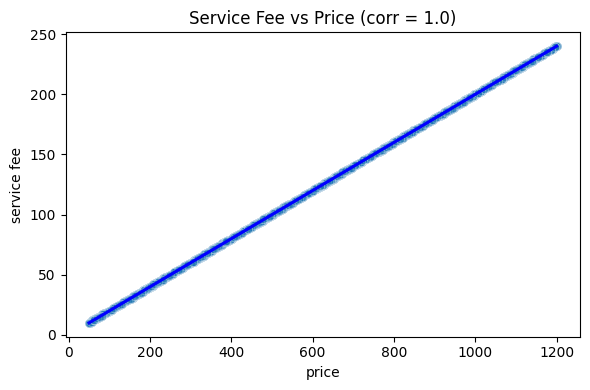

In [ ]:

corr_val = df[['price','service fee']].corr().iloc[0,1]
print(corr_val)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='price', y='service fee', alpha=0.3)
sns.regplot(data=df, x='price', y='service fee', scatter=False, color='blue')
plt.title('Service Fee vs Price (corr = ' + str(round(corr_val, 3)) + ')')
plt.tight_layout()
plt.show()

## Avg review rate number by neighbourhood group and room type


---



room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.346457         NaN      3.329706     3.264957
Brooklyn                    3.250378        3.75      3.264465     3.336983
Manhattan                   3.275807        3.50      3.277576     3.257459
Queens                      3.349154        3.75      3.315585     3.377778
Staten Island               3.329087         NaN      3.479482     3.533333


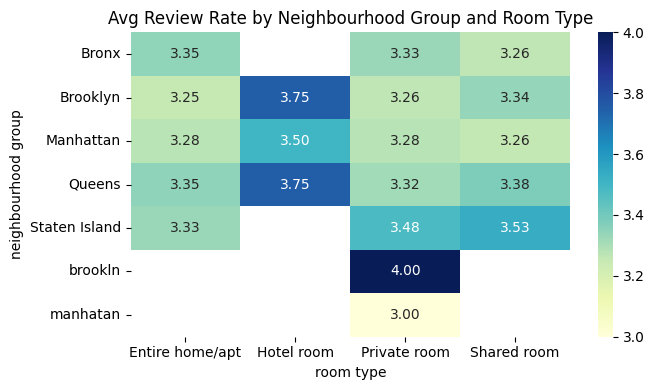

In [ ]:

pivot_rt = df.pivot_table(index='neighbourhood group', columns='room type', values='review rate number', aggfunc='mean')
print(pivot_rt.head())
plt.figure(figsize=(7,4))
sns.heatmap(pivot_rt, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Avg Review Rate by Neighbourhood Group and Room Type')
plt.tight_layout()
plt.show()

## Host listings count vs availability

---



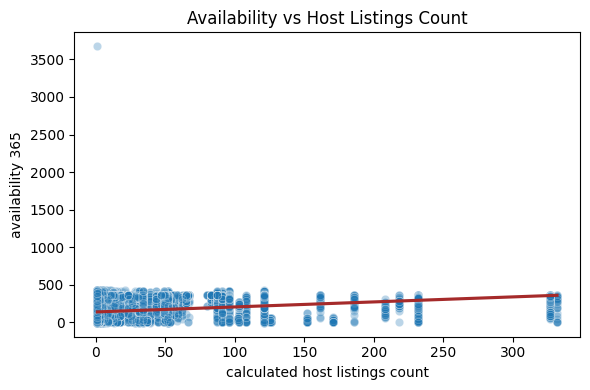

In [ ]:

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='calculated host listings count', y='availability 365', alpha=0.3)
sns.regplot(data=df, x='calculated host listings count', y='availability 365', scatter=False, color='brown')
plt.title('Availability vs Host Listings Count')
plt.tight_layout()
plt.show()